# Fashion Classification

### Importing Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
os.chdir("C:\\Users\\Thiago\\Desktop\\Python-ML\\Datasets")

In [11]:
f_train_df = pd.read_csv("fashion-mnist_train.csv",sep = ",")

In [12]:
f_test_df = pd.read_csv("fashion-mnist_test.csv",sep = ",")

# Visualizing the Dataset

In [14]:
f_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
f_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
f_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
f_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [18]:
f_train_df.shape

(60000, 785)

In [19]:
f_test_df.shape

(10000, 785)

### Converting into arrays to visualize the images

In [20]:
train = np.array(f_train_df, dtype= "float32" )

In [22]:
test = np.array(f_test_df, dtype= "float32" )

###### Remember the 10 classes decoding is as follows:

###### 0 => T-shirt/top

###### 1 => Trouser

###### 2 => Pullover

###### 3 => Dress

###### 4 => Coat

###### 5 => Sandal

###### 6 => Shirt

###### 7 => Sneaker

###### 8 => Bag

###### 9 => Ankle boot

9.0

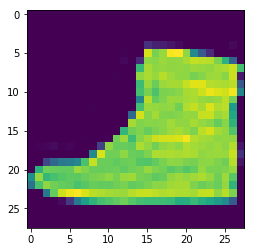

In [38]:
import random
i = random.randint(1,60000)
plt.imshow(train[i, 1:].reshape(28 , 28))
target = train[i,0]
target

In [46]:
def allimgs(W_grid, L_grid, figureSize = (17,17) ):
    fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

    axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

    n_train = len(train) # get the length of the training dataset

    # Select a random number from 0 to n_training
    for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

        # Select a random number
        index = np.random.randint(0, n_train)
        # read and display an image with the selected index    
        axes[i].imshow( train[index,1:].reshape((28,28)) )
        axes[i].set_title(train[index,0], fontsize = 8)
        axes[i].axis('off')

    plt.subplots_adjust(hspace=0.4)

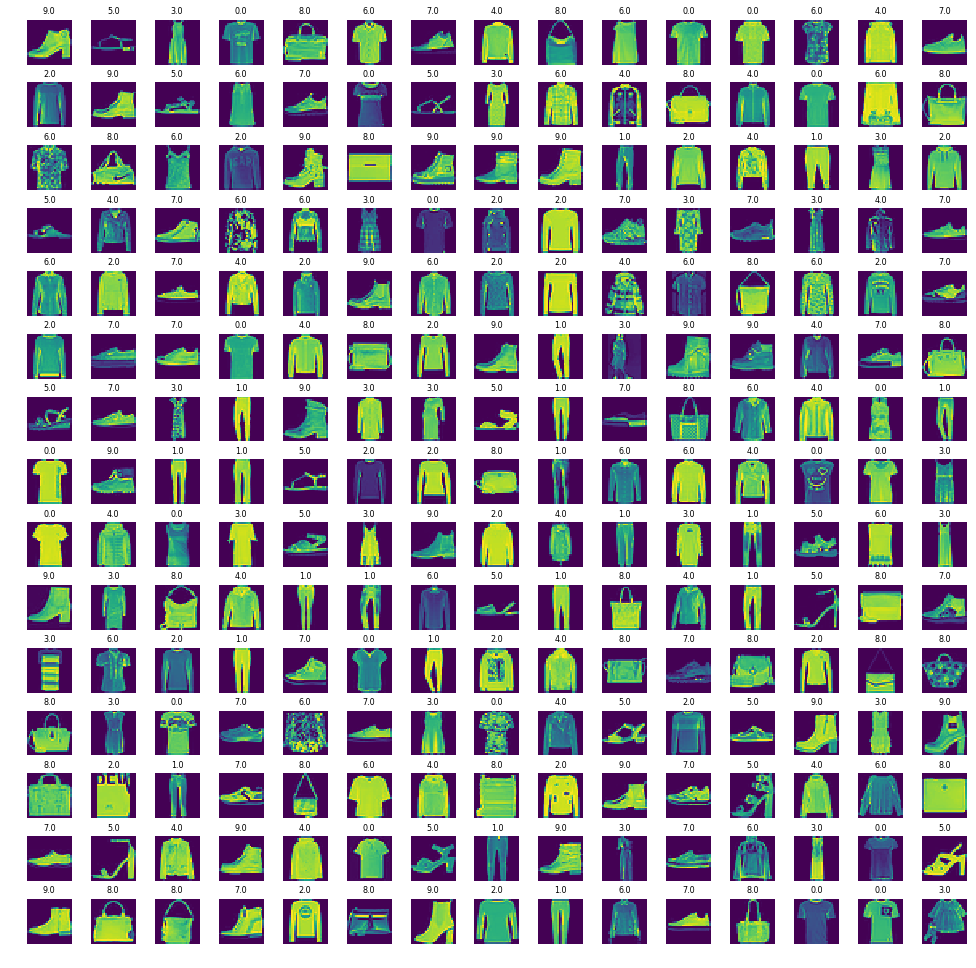

In [51]:
allimgs(L_grid=15, W_grid=15, figureSize= (20,20))

# Model Training

In [53]:
X_train = train[:,1:]/255
y_train = train[:,0]

In [55]:
X_test = test[:,1:]/255
y_test = test[:,0]

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train, test_size = 0.2, random_state=12345)

In [57]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [58]:
X_train.shape

(48000, 28, 28, 1)

In [59]:
X_test.shape

(10000, 28, 28, 1)

In [60]:
X_validate.shape

(12000, 28, 28, 1)

In [69]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


Using TensorFlow backend.


In [70]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\Thiago\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Thiago\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  if __name__ == '__main__':
C:\Users\Thiago\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  # Remove the CWD from sys.path while we load stuff.


In [73]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [72]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))


C:\Users\Thiago\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 73s 2ms/step - loss: 0.9800 - acc: 0.6209 - val_loss: 0.4918 - val_acc: 0.8276
Epoch 2/50
 3584/48000 [=>............................] - ETA: 1:18 - loss: 0.4771 - acc: 0.8368

KeyboardInterrupt: 

# Evaluating the model

In [75]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 3s 332us/step
Test Accuracy : 0.828


In [74]:
predicted_classes = cnn_model.predict_classes(X_test)

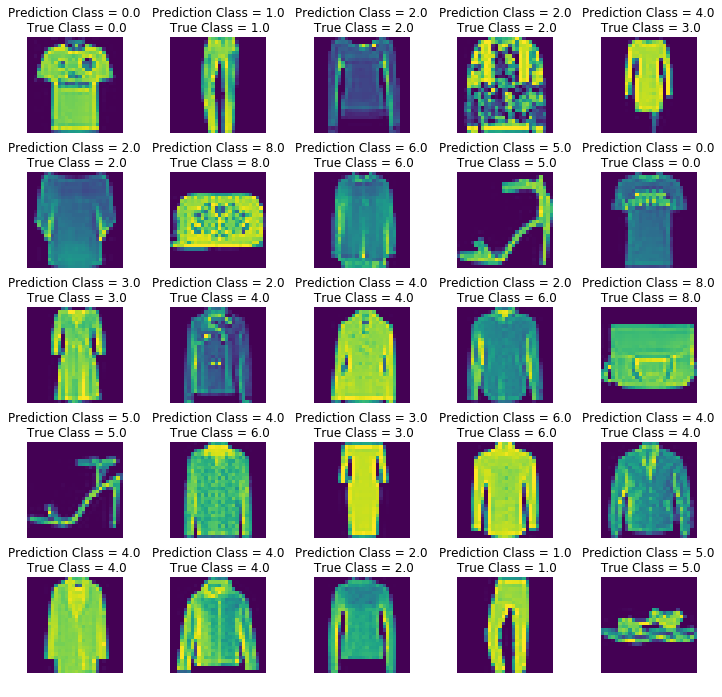

In [76]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

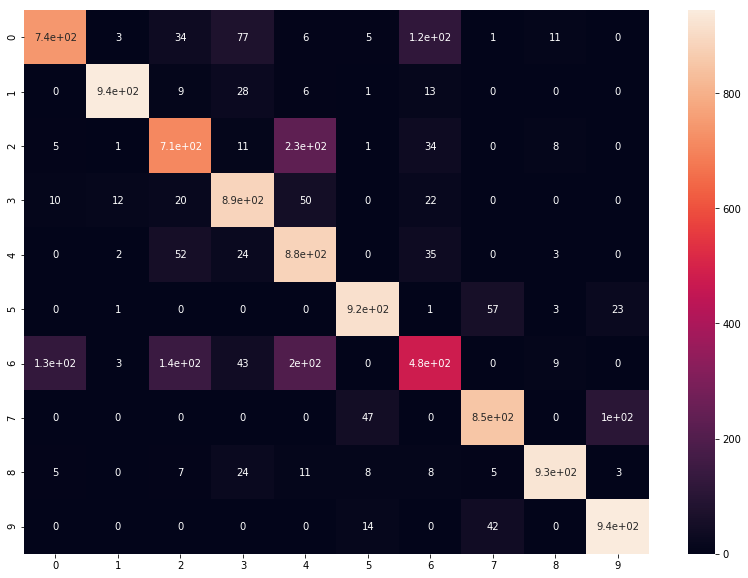

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [78]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.74      0.79      1000
     Class 1       0.98      0.94      0.96      1000
     Class 2       0.73      0.71      0.72      1000
     Class 3       0.81      0.89      0.85      1000
     Class 4       0.64      0.88      0.74      1000
     Class 5       0.92      0.92      0.92      1000
     Class 6       0.67      0.48      0.56      1000
     Class 7       0.89      0.85      0.87      1000
     Class 8       0.96      0.93      0.95      1000
     Class 9       0.88      0.94      0.91      1000

   micro avg       0.83      0.83      0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

